## Decompose seasonality

Decompose one of each training set, to determine their trend/seasonality/residual.

based on: https://github.com/MKB-Datalab/time-series-analysis-with-SARIMAX-and-Prophet/blob/master/notebooks/02-Forecasting_with_SARIMAX.ipynb

### Conclusion

Every dataset has a daily seasonality. (period=4*24). On top of this, the industial plants also have weekly seasonality, since they're shut off in the weekend.

In [33]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.api as sm

usable_data_folder = Path(r"C:\Users\Flin\OneDrive - TU Eindhoven\Flin\Flin\01 - Uni\00_Internship\Nokia\00_Programming\forecasting\datasets\train")



In [42]:
def decompose(df, period, title=None, xlim=None):
    if period == "d":
        p = 4*24
    elif period == "w":
        p = 4*24*7
    else:
        raise NotImplementedError

    if xlim is None:
        pass
        xlim=[None, None]
    elif isinstance(xlim, (int, float)):
        xlim = [None, int(xlim)]
    elif isinstance(xlim, list):
        assert len(xlim) == 2
        xlim = [int(xlim[0]), int(xlim[1])]

    decomposition = sm.tsa.seasonal_decompose(df[xlim[0]:xlim[1]], 
                                            model = 'additive',
                                            period=p, # cycle repeats 365 days, i.e., every year,
                                            ) 

    fig = decomposition.plot()
    fig.suptitle(title)
    plt.show()

def lazy_decompose(path, xlim=None):
    df = pd.read_csv(path)
    df = df[["y"]]
    for v in ["d", "w"]:
        decompose(df=df, period=v, title=f"{v}_{path.stem}", xlim=xlim)


### RESIDENTIAL WITH PV

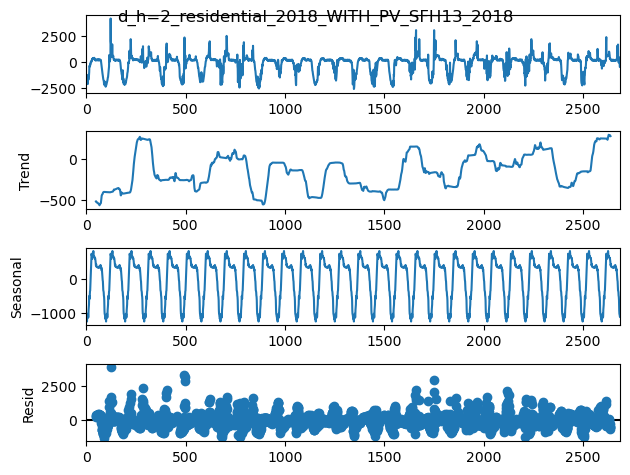

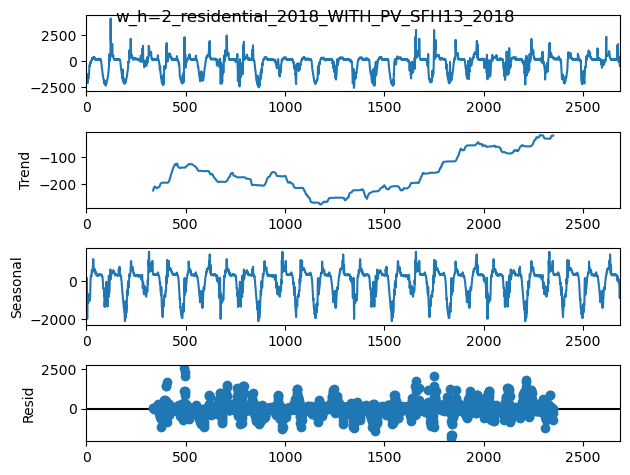

In [43]:
fn = r"residential_with_pv\h=2_residential_2018_WITH_PV_SFH13_2018.csv" # r"industrial\h=2_industrial_2016_LG_1.csv"
path = usable_data_folder / fn

lazy_decompose(path, xlim=4*24*7*4)

## RESIDENTIAL NO PV

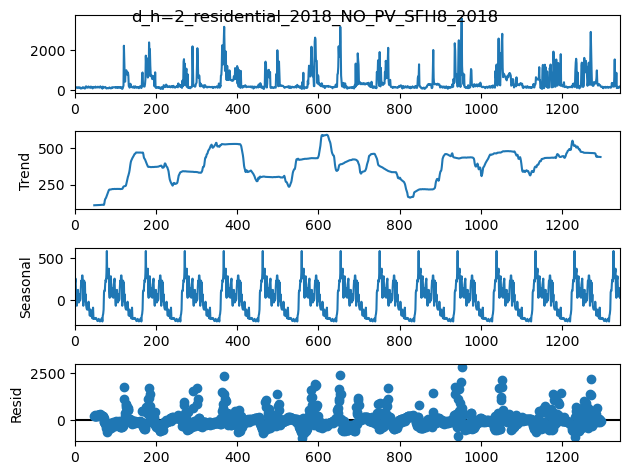

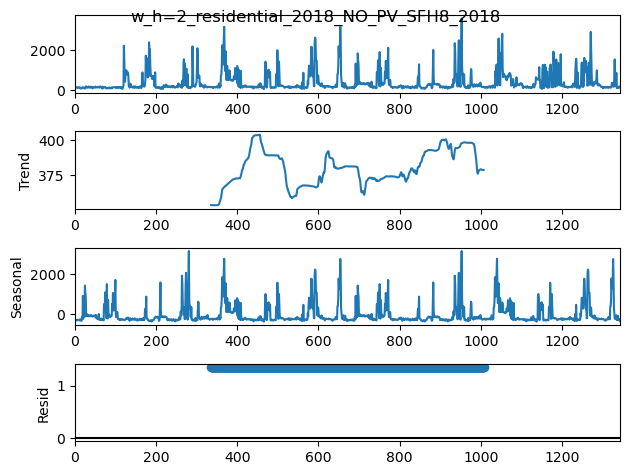

In [44]:
fn = r"residential_no_pv\h=2_residential_2018_NO_PV_SFH8_2018.csv" # r"industrial\h=2_industrial_2016_LG_1.csv"
path = usable_data_folder / fn

lazy_decompose(path, xlim=4*24*7*2)

## INDUSTRIAL

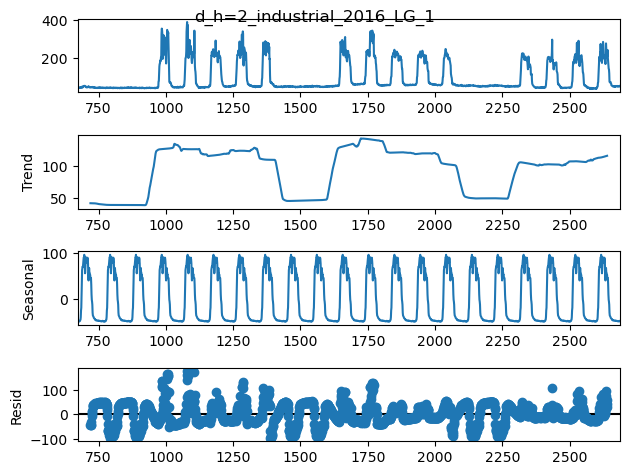

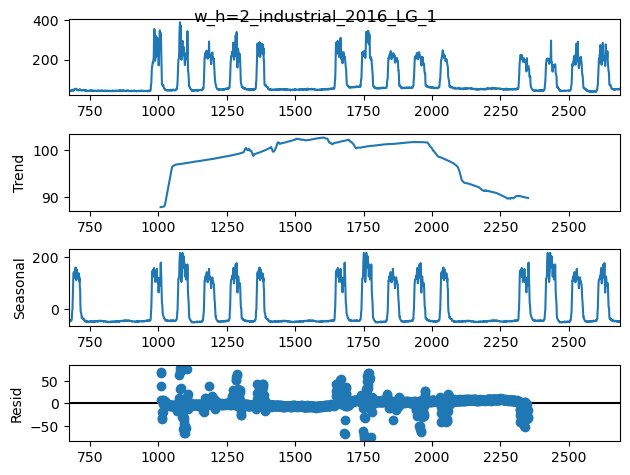

In [45]:
fn = r"industrial\h=2_industrial_2016_LG_1.csv"
path = usable_data_folder / fn

lazy_decompose(path, xlim=[4*24*7, 4*24*7*4])